In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
tfds.disable_progress_bar()
import collections
import pathlib
import re
import string
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras import utils
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import matplotlib.pyplot as plt
import tensorflow_text as tf_text
from tensorflow import keras

In [2]:
tfds.disable_progress_bar()

def plot_graphs(history, metric):   #define a function to plot the history graph with accuracy and loss
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [3]:
#batch_size = 32
seed = 42 #set seed

train_dataset = preprocessing.text_dataset_from_directory( #separate the dataset to training dataset and test dataset
    'archive',
#    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

Found 1000 files belonging to 10 classes.
Using 800 files for training.


In [4]:
test_dataset = preprocessing.text_dataset_from_directory(
    'archive',
#    batch_size=batch_size,
    validation_split=.2,
    subset='validation',
    seed=seed)

Found 1000 files belonging to 10 classes.
Using 200 files for validation.


In [5]:
VOCAB_SIZE=5000   #set the size of the vocabulary lab 
#The raw text loaded by tfds needs to be processed before it can be used in a model. 
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization( # experimental preprocessing
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text)) #Create the layer, and pass the dataset's text to the layer's .adapt method
vocab = np.array(encoder.get_vocabulary())

In [6]:
model = tf.keras.Sequential([ #build the sequential
    encoder,  #first encoder layer defined above
    tf.keras.layers.Embedding(  # with 64 dim output
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), #LSTM 64 dims
    tf.keras.layers.Dense(64, activation='relu'),#64 cells with relu activation function
    tf.keras.layers.Dense(10, activation='softmax') #5 dim output with softmax activation function
])

In [7]:
model.compile(loss='sparse_categorical_crossentropy', # loss function 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  #optimizer with learning rate .001
              metrics=['accuracy']) # metrics set to be accuracy

In [8]:
earlystopping_cb = keras.callbacks.EarlyStopping (patience=10, restore_best_weights=True) # set callbacks

In [9]:
history = model.fit(train_dataset, epochs=50,  #training process epochs=50
                    validation_data=test_dataset, 
                    validation_steps=5,
                    callbacks=earlystopping_cb) #set callbacks

Epoch 1/50
25/25 [==============================] - 42s 2s/step - loss: 2.2941 - accuracy: 0.1663 - val_loss: 2.2780 - val_accuracy: 0.2375
Epoch 2/50
25/25 [==============================] - 36s 1s/step - loss: 2.1467 - accuracy: 0.3750 - val_loss: 1.9547 - val_accuracy: 0.3313
Epoch 3/50
25/25 [==============================] - 41s 2s/step - loss: 1.7230 - accuracy: 0.3638 - val_loss: 1.6198 - val_accuracy: 0.3688
Epoch 4/50
25/25 [==============================] - 38s 2s/step - loss: 1.3173 - accuracy: 0.4638 - val_loss: 1.3532 - val_accuracy: 0.4625
Epoch 5/50
25/25 [==============================] - 41s 2s/step - loss: 1.0952 - accuracy: 0.5775 - val_loss: 1.1344 - val_accuracy: 0.5188
Epoch 6/50
25/25 [==============================] - 37s 1s/step - loss: 1.0613 - accuracy: 0.5763 - val_loss: 1.1824 - val_accuracy: 0.4875
Epoch 7/50
25/25 [==============================] - 38s 2s/step - loss: 0.8969 - accuracy: 0.6288 - val_loss: 0.9941 - val_accuracy: 0.6500
Epoch 8/50
25/25 [==

In [10]:
test_loss, test_acc = model.evaluate(test_dataset)  #result evaluation 

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

7/7 [==============================] - 2s 257ms/step - loss: 0.5610 - accuracy: 0.8350
Test Loss: 0.5610285401344299
Test Accuracy: 0.8349999785423279


(0.0, 2.4087144371995235)

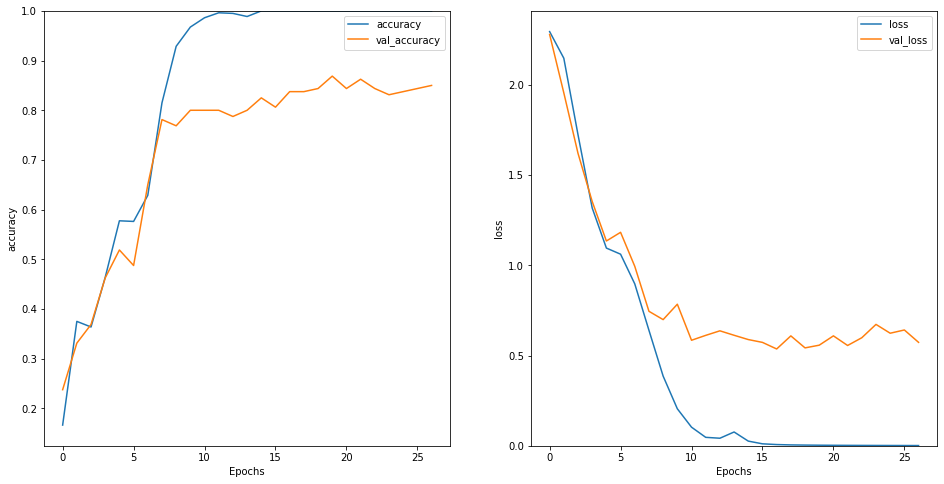

In [11]:
plt.figure(figsize=(16,8)) 
plt.subplot(1,2,1)
plot_graphs(history, 'accuracy')
plt.ylim(None,1)
plt.subplot(1,2,2)
plot_graphs(history, 'loss')
plt.ylim(0,None)